In [2]:
import os

import json


def process_problem_data(base_path):

    """

    Iterates through all problem directories, extracts problem statements

    and sentences from `chunks_labeled.json`, and returns a list of dictionaries.


    Args:

        base_path (str): The path to the directory containing all the problems

                         (e.g., 'math-rollouts/.../correct_base_solution').


    Returns:

        list: A list of dictionaries, where each dictionary contains the problem

              and all sentences for a given problem directory.

    """

    all_problem_data = []


    # Check if the base path exists

    if not os.path.isdir(base_path):

        print(f"Error: The directory '{base_path}' was not found.")

        return all_problem_data

    print(f"Found problem directory: {base_path}")


    # List all entries in the base directory

    problem_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    print(f"Found problem directory: {problem_dirs}")


    if not problem_dirs:

        print(f"No problem directories found in '{base_path}'.")

        return all_problem_data


    # Iterate through each problem directory (e.g., problem_330, problem_1591)

    for problem_name in problem_dirs:

        problem_path = os.path.join(base_path, problem_name)

       

        # Define the file paths for the problem and chunks

        problem_file = os.path.join(problem_path, "problem.json")

        chunks_file = os.path.join(problem_path, "chunks_labeled.json")

       

        problem_text = ""

        allsentences = []

       

        # Load the problem statement

        try:

            with open(problem_file, 'r') as f:

                problem_data = json.load(f)

                problem_text = problem_data.get("problem", "")

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load problem.json. Error: {e}")

            continue


        # Load all sentences from chunks_labeled.json

        try:

            with open(chunks_file, 'r') as f:

                chunks_data = json.load(f)

                allsentences = [chunk["chunk"] for chunk in chunks_data]

        except (FileNotFoundError, json.JSONDecodeError) as e:

            print(f"Skipping {problem_name}: Could not load chunks_labeled.json. Error: {e}")

            continue


        # Create a dictionary to store the extracted data

        problem_info = {

            "problem_id": problem_name,

            "problem_statement": problem_text,

            "sentences": allsentences

        }

        all_problem_data.append(problem_info)


    return all_problem_data

    print("No data was loaded.")




# Define the base directory for all problems
# deepseek-r1-distill-qwen-14b

base_problem_dir = "math-rollouts/deepseek-r1-distill-qwen-14b/temperature_0.6_top_p_0.95/correct_base_solution"

# Run the function to get all the data

correct_all_data = process_problem_data(base_problem_dir)


# Now, `all_data` is a list of dictionaries. You can iterate through it.

print(f"Successfully loaded data for {len(correct_all_data)} problems.")

# Define the base directory for all problems

base_problem_dir = "math-rollouts/deepseek-r1-distill-qwen-14b/temperature_0.6_top_p_0.95/incorrect_base_solution"

# Run the function to get all the data

incorrect_all_data = process_problem_data(base_problem_dir)


print(f"Successfully loaded data for {len(incorrect_all_data)} problems.") 

Found problem directory: math-rollouts/deepseek-r1-distill-qwen-14b/temperature_0.6_top_p_0.95/correct_base_solution
Found problem directory: ['problem_1591', 'problem_4605', 'problem_2236', 'problem_3360', 'problem_6481', 'problem_4682', 'problem_2870', 'problem_4019', 'problem_3550', 'problem_2238', 'problem_3935', 'problem_6596', 'problem_4164', 'problem_2189', 'problem_2050', 'problem_6998', 'problem_3916', 'problem_330', 'problem_3448', 'problem_2137']
Successfully loaded data for 20 problems.
Found problem directory: math-rollouts/deepseek-r1-distill-qwen-14b/temperature_0.6_top_p_0.95/incorrect_base_solution
Found problem directory: ['problem_2236', 'problem_4605', 'problem_1591', 'problem_6481', 'problem_4682', 'problem_3360', 'problem_3550', 'problem_4019', 'problem_2870', 'problem_2189', 'problem_4164', 'problem_3935', 'problem_6596', 'problem_2238', 'problem_6998', 'problem_3916', 'problem_2050', 'problem_3448', 'problem_330', 'problem_2137']
Successfully loaded data for 20 

In [3]:
all_data = correct_all_data + incorrect_all_data

In [4]:
all_data

[{'problem_id': 'problem_1591',
  'problem_statement': 'Dr. Fu Manchu has a bank account that has an annual interest rate of 6 percent, but it compounds monthly.  If this is equivalent to a bank account that compounds annually at a rate of $r$ percent, then what is $r$?  (Give your answer to the nearest hundredth.)',
  'sentences': ["Okay, so I've got this problem here about bank accounts and interest rates.",
   'Let me try to figure it out step by step.',
   'First, the problem says Dr.',
   'Fu Manchu has a bank account with an annual interest rate of 6 percent, but it compounds monthly.',
   'They want to find the equivalent annual interest rate, r percent, if it were compounded annually instead.',
   'And I need to give the answer to the nearest hundredth.',
   'Hmm, okay.',
   'I remember that compound interest formulas can be a bit tricky, but let me recall the basic concepts.',
   'When interest is compounded more frequently, like monthly instead of annually, the effective annu

In [5]:
import os
import json
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BitsAndBytesConfig, AutoModelForCausalLM, pipeline
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import gc
from tqdm import tqdm

In [6]:
model_name = "Qwen/Qwen3-14B" # Or any other suitable model

mname = model_name

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Important: Add a pad token if the tokenizer doesn't have one, especially for decoder models.

if tokenizer.pad_token is None:

    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

In [7]:
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True,  torch_dtype=torch.bfloat16, device_map="auto")

The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['output_attentions']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
llama_percent = 20 / (32 * 32)

In [9]:
llama_percent

0.01953125

In [10]:
num_layers = model.config.num_hidden_layers
num_heads = model.config.num_attention_heads

In [11]:
equivalent_num_heads = num_heads * num_layers * llama_percent

In [12]:
equivalent_num_heads

31.25

In [13]:
# --- Helper: Sentence boundaries using tokenizer ---
def get_raw_tokens(text, model_name=None):
    return tokenizer(text)['input_ids']

def get_sentence_token_boundaries(text, sentences, model_name=None):
    import re
    def normalize_spaces(s):
        return re.sub(r"[\u00A0\u1680\u2000-\u200B\u202F\u205F\u3000\uFEFF]", " ", s)
    char_positions = []
    search_start = 0
    text_normalized = normalize_spaces(text)
    for sentence in sentences:
        sentence_normalized = normalize_spaces(sentence)
        norm_pos = text_normalized.find(sentence_normalized, search_start)
        if norm_pos == -1:
            sentence_stripped = sentence_normalized.strip()
            norm_pos = text_normalized.find(sentence_stripped, search_start)
            if norm_pos == -1:
                raise ValueError(f"Sentence not found in text: {sentence}")
            norm_end = norm_pos + len(sentence_stripped)
        else:
            norm_end = norm_pos + len(sentence_normalized)
        original_pos = 0
        normalized_count = 0
        actual_start = -1
        actual_end = -1
        for i, char in enumerate(text):
            if normalized_count == norm_pos and actual_start == -1:
                actual_start = i
            if normalized_count == norm_end:
                actual_end = i
                break
            if normalize_spaces(char) == " " or char == text_normalized[normalized_count]:
                normalized_count += 1
        if actual_end == -1 and normalized_count == norm_end:
            actual_end = len(text)
        char_positions.append((actual_start, actual_end))
        search_start = norm_end
    token_boundaries = []
    for char_start, char_end in char_positions:
        tokens_to_start = len(get_raw_tokens(text[:char_start], model_name)) if char_start > 0 else 0
        tokens_to_end = len(get_raw_tokens(text[:char_end], model_name))
        token_boundaries.append((tokens_to_start, tokens_to_end))
    return token_boundaries

# --- Helper: Average attention over sentence boundaries ---
def _compute_averaged_matrix(matrix, sentence_boundaries):
    n = len(sentence_boundaries)
    result = np.zeros((n, n), dtype=np.float32)
    for i in range(n):
        row_start, row_end = sentence_boundaries[i]
        row_start = min(row_start, matrix.shape[0] - 1)
        row_end = min(row_end, matrix.shape[0] - 1)
        if row_start >= row_end:
            continue
        for j in range(n):
            col_start, col_end = sentence_boundaries[j]
            col_start = min(col_start, matrix.shape[1] - 1)
            col_end = min(col_end, matrix.shape[1] - 1)
            if col_start >= col_end:
                continue
            region = matrix[row_start:row_end, col_start:col_end]
            if region.size > 0:
                result[i, j] = np.mean(region)
    return result

# --- Helper: Get vertical scores (receiver heads) ---
def get_vertical_scores(avg_mat, proximity_ignore=1, control_depth=False, score_type="mean"):
    n = avg_mat.shape[0]
    trius = np.triu_indices_from(avg_mat, k=1)
    avg_mat = avg_mat.copy()
    avg_mat[trius] = np.nan
    trils = np.triu_indices_from(avg_mat, k=-proximity_ignore + 1)
    avg_mat[trils] = np.nan
    if control_depth:
        per_row = np.sum(~np.isnan(avg_mat), axis=1)
        avg_mat = stats.rankdata(avg_mat, axis=1, nan_policy="omit") / per_row[:, None]
    n = avg_mat.shape[-1]
    vert_scores = []
    for i in range(n):
        vert_lines = avg_mat[i + proximity_ignore :, i]
        if score_type == "mean":
            vert_score = np.nanmean(vert_lines)
        elif score_type == "median":
            vert_score = np.nanmedian(vert_lines)
        else:
            raise ValueError(f"Unknown score_type: {score_type}")
        vert_scores.append(vert_score)
    return np.array(vert_scores)


In [14]:
def get_3d_ar_kurtosis(all_layer_head_vert_scores):
    """
    Compute kurtosis across the last axis (sentences) for each (layer, head).
    Input: all_layer_head_vert_scores: shape (num_layers, num_heads, num_sentences)
    Output: layer_head_kurtosis: shape (num_layers, num_heads)
    """
    return stats.kurtosis(
        all_layer_head_vert_scores, axis=2, fisher=True, bias=True, nan_policy="omit"
    )

In [15]:
def process_single_problem_optimized_with_running_attention_sum(problem_data, model, tokenizer, model_name):

    """

    Optimized version that returns vertical scores and attention weights for running sum.

   

    Returns:

        dict: {

            'vertical_scores': np.array shape (num_layers, num_heads, num_sentences),

            'attention_weights': np.array shape (num_layers, num_heads, seq_len, seq_len),

            'seq_len': int,

            'problem_id': str

        } or None if failed

    """

    try:

        # Extract problem data

        problem_statement = problem_data['problem_statement']

        sentences = problem_data['sentences']

       

        # Limit sentence count to avoid memory issues

        max_sentences = 100

        if len(sentences) > max_sentences:

            sentences = sentences[:max_sentences]

       

        # Reconstruct input_text

        input_text = problem_statement + "\n" + "\n".join(sentences)

       

        # Tokenize with smaller max_length to reduce memory usage

        inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=1024)

       

        # Move to GPU if available

        if torch.cuda.is_available():

            inputs = {k: v.cuda() for k, v in inputs.items()}

       

        with torch.no_grad():

            outputs = model(**inputs, output_attentions=True)

        attention_weights = outputs.attentions

       

        # Get sentence boundaries

        sentence_boundaries = get_sentence_token_boundaries(input_text, sentences, model_name)

       

        if len(sentence_boundaries) == 0:

            return None

       

        # Get dimensions

        num_layers = len(attention_weights)

        num_heads = attention_weights[0].shape[1]

        seq_len = attention_weights[0].shape[-1]

        num_sentences = len(sentence_boundaries)

       

        # Initialize arrays

        all_layer_head_vert_scores = np.zeros((num_layers, num_heads, num_sentences), dtype=np.float32)

        attention_matrices = np.zeros((num_layers, num_heads, seq_len, seq_len), dtype=np.float32)

       

        for layer in range(num_layers):

            for head in range(num_heads):

                # FIX: Convert BFloat16 to Float32 BEFORE converting to NumPy

                attn_tensor = attention_weights[layer][0, head].float()  # BFloat16 -> Float32

                attn_mat = attn_tensor.detach().cpu().numpy().astype(np.float32)

               

                # Store raw attention matrix

                attention_matrices[layer, head] = attn_mat

               

                # Compute vertical scores

                avg_mat = _compute_averaged_matrix(attn_mat, sentence_boundaries)

                vert_scores = get_vertical_scores(avg_mat, proximity_ignore=1, control_depth=False, score_type="mean")

               

                # Handle case where vert_scores might be shorter than expected

                actual_len = min(len(vert_scores), num_sentences)

                all_layer_head_vert_scores[layer, head, :actual_len] = vert_scores[:actual_len]

       

        # Clear GPU memory

        del outputs, attention_weights

        if torch.cuda.is_available():

            torch.cuda.empty_cache()

       

        return {

            'vertical_scores': all_layer_head_vert_scores,

            'attention_weights': attention_matrices,

            'seq_len': seq_len,

            'problem_id': problem_data['problem_id']

        }

       

    except Exception as e:

        print(f"Error processing problem {problem_data['problem_id']}: {e}")

        # Clear GPU memory on error

        if torch.cuda.is_available():

            torch.cuda.empty_cache()

        return None


def quick_test_attention_processing(all_data, model, tokenizer, model_name, max_problems=5):
    """
    Quick test version - processes only a few problems for rapid testing.
    """
    print(f"QUICK TEST: Processing only {max_problems} problems...")
    
    # Limit to first few problems
    test_data = all_data[:max_problems]
    
    successful_problems = 0
    all_problem_vert_scores = []
    
    for i, problem in enumerate(test_data):
        print(f"Quick test {i+1}/{len(test_data)}: {problem['problem_id']}")
        
        try:
            # Extract and limit data aggressively
            problem_statement = problem['problem_statement']
            sentences = problem['sentences'][:10]  # Only first 10 sentences
            
            # Create very short input
            input_text = problem_statement + "\n" + "\n".join(sentences)
            inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=256)  # Very short
            
            if torch.cuda.is_available():
                inputs = {k: v.cuda() for k, v in inputs.items()}
            
            with torch.no_grad():
                outputs = model(**inputs, output_attentions=True)
            attention_weights = outputs.attentions
            
            # Quick sentence boundaries
            sentence_boundaries = get_sentence_token_boundaries(input_text, sentences, model_name)
            
            if len(sentence_boundaries) == 0:
                print(f"  SKIP: No boundaries")
                continue
            
            # Quick vertical scores computation
            num_layers = len(attention_weights)
            num_heads = attention_weights[0].shape[1]
            num_sentences = len(sentence_boundaries)
            
            all_layer_head_vert_scores = np.zeros((num_layers, num_heads, num_sentences), dtype=np.float32)
            
            for layer in range(num_layers):
                for head in range(num_heads):
                    attn_tensor = attention_weights[layer][0, head].float()
                    attn_mat = attn_tensor.detach().cpu().numpy().astype(np.float32)
                    
                    avg_mat = _compute_averaged_matrix(attn_mat, sentence_boundaries)
                    vert_scores = get_vertical_scores(avg_mat, proximity_ignore=1, control_depth=False, score_type="mean")
                    
                    actual_len = min(len(vert_scores), num_sentences)
                    all_layer_head_vert_scores[layer, head, :actual_len] = vert_scores[:actual_len]
            
            all_problem_vert_scores.append(all_layer_head_vert_scores)
            successful_problems += 1
            print(f"  SUCCESS! Shape: {all_layer_head_vert_scores.shape}")
            
            # Cleanup
            del outputs, attention_weights
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
                
        except Exception as e:
            print(f"  FAILED: {e}")
            continue
    
    print(f"\nQuick test complete! {successful_problems}/{len(test_data)} successful")
    
    if successful_problems > 0:
        # Quick kurtosis computation
        min_sentences = min(scores.shape[2] for scores in all_problem_vert_scores)
        truncated_scores = [scores[:, :, :min_sentences] for scores in all_problem_vert_scores]
        stacked_scores = np.stack(truncated_scores, axis=0)
        averaged_scores = np.mean(stacked_scores, axis=0)
        
        layer_head_kurtosis = get_3d_ar_kurtosis(averaged_scores)
        
        print(f"Quick kurtosis shape: {layer_head_kurtosis.shape}")
        print(f"Quick kurtosis range: {np.nanmin(layer_head_kurtosis):.3f} to {np.nanmax(layer_head_kurtosis):.3f}")
        
        return layer_head_kurtosis
    
    return None

def process_all_problems_with_iterative_attention_sum(all_data, model, tokenizer, model_name, batch_size=1, max_problems=None):
    """
    Process problems and maintain running sums for attention weights to save memory.
    Uses iterative summation instead of storing all attention matrices.
    
    OPTIMIZATIONS:
    - Smaller batch_size default (1 instead of 3)
    - max_problems parameter to limit total processing
    - More frequent memory cleanup
    """
    # OPTIMIZATION: Limit total problems if specified
    if max_problems is not None:
        all_data = all_data[:max_problems]
        print(f"OPTIMIZATION: Limited to {max_problems} problems")
    
    all_problem_vert_scores = []
   
    # Initialize variables for running attention sum
    attention_sum = None
    min_seq_len = float('inf')
    successful_problems = 0
   
    print(f"Processing {len(all_data)} problems in batches of {batch_size}...")
   
    for batch_start in tqdm(range(0, len(all_data), batch_size), desc="Processing batches"):
        batch_end = min(batch_start + batch_size, len(all_data))
        batch_problems = all_data[batch_start:batch_end]
       
        for i, problem in enumerate(batch_problems):
            global_idx = batch_start + i
            print(f"Processing problem {global_idx+1}/{len(all_data)}: {problem['problem_id']}")
           
            result = process_single_problem_optimized_with_running_attention_sum(problem, model, tokenizer, model_name)
           
            if result is not None:
                # Add vertical scores to list as before
                all_problem_vert_scores.append(result['vertical_scores'])
               
                # Handle attention weights with running sum
                current_attention = result['attention_weights']
                current_seq_len = result['seq_len']
               
                # Track minimum sequence length
                min_seq_len = min(min_seq_len, current_seq_len)
               
                # Initialize attention_sum on first successful problem
                if attention_sum is None:
                    num_layers, num_heads = current_attention.shape[:2]
                    attention_sum = np.zeros((num_layers, num_heads, current_seq_len, current_seq_len), dtype=np.float64)
               
                # If current problem has smaller seq_len, resize attention_sum
                if current_seq_len < attention_sum.shape[-1]:
                    print(f"  Resizing attention_sum from {attention_sum.shape[-1]} to {current_seq_len}")
                    attention_sum = attention_sum[:, :, :current_seq_len, :current_seq_len]
               
                # Add current attention to running sum
                current_seq_len_to_use = min(current_seq_len, attention_sum.shape[-1])
                attention_sum += current_attention[:, :, :current_seq_len_to_use, :current_seq_len_to_use].astype(np.float64)
                successful_problems += 1
               
                print(f"  SUCCESS: Added to running sum. Total successful: {successful_problems}")
               
                # Clean up current result to save memory immediately
                del result, current_attention
            else:
                print(f"  FAILED: Got None result")
       
        # OPTIMIZATION: More aggressive memory cleanup
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
            torch.cuda.synchronize()  # Wait for GPU operations to complete
       
        print(f"Completed batch {batch_start//batch_size + 1}. Successfully processed {successful_problems} problems so far.")
   
    # Compute final averaged attention weights by dividing the sum

    if attention_sum is not None and successful_problems > 0:

        averaged_attention_weights = (attention_sum / successful_problems).astype(np.float32)

        print(f"\nFinal averaged attention weights shape: {averaged_attention_weights.shape}")

        print(f"Based on {successful_problems} successful problems")

       

        # Clean up the sum to free memory

        del attention_sum

    else:

        averaged_attention_weights = None

        print("\nNo successful problems processed")

   

    return {

        'all_problem_vert_scores': all_problem_vert_scores,

        'averaged_attention_weights': averaged_attention_weights,

        'successful_problems': successful_problems,

        'min_seq_len': min_seq_len if min_seq_len != float('inf') else 0

    }




In [16]:
# Usage:

print("Starting memory-efficient processing with iterative attention summation...")

results = process_all_problems_with_iterative_attention_sum(
    all_data, model, tokenizer, model_name, batch_size=4
)


print(f"\nProcessing complete!")

print(f"Successfully processed {results['successful_problems']} problems")

print(f"Minimum sequence length: {results['min_seq_len']}")


if results['averaged_attention_weights'] is not None:

    print(f"Averaged attention weights shape: {results['averaged_attention_weights'].shape}")

   

    # Store results for further analysis

    all_problem_vert_scores = results['all_problem_vert_scores']

    averaged_attention_weights = results['averaged_attention_weights']

   

    print("Memory-efficient processing with iterative summation completed successfully!")

else:

    print("No attention weights were computed.")

Starting memory-efficient processing with iterative attention summation...
Processing 40 problems in batches of 4...


Processing batches:   0%|          | 0/10 [00:00<?, ?it/s]

Processing problem 1/40: problem_1591


/tmp/ipykernel_473089/4037439352.py:83: RuntimeWarning: Mean of empty slice
  vert_score = np.nanmean(vert_lines)


  SUCCESS: Added to running sum. Total successful: 1
Processing problem 2/40: problem_4605
  SUCCESS: Added to running sum. Total successful: 2
Processing problem 3/40: problem_2236
  SUCCESS: Added to running sum. Total successful: 3
Processing problem 4/40: problem_3360


Processing batches:  10%|█         | 1/10 [04:49<43:25, 289.51s/it]

  SUCCESS: Added to running sum. Total successful: 4
Completed batch 1. Successfully processed 4 problems so far.
Processing problem 5/40: problem_6481
  SUCCESS: Added to running sum. Total successful: 5
Processing problem 6/40: problem_4682
  SUCCESS: Added to running sum. Total successful: 6
Processing problem 7/40: problem_2870
  SUCCESS: Added to running sum. Total successful: 7
Processing problem 8/40: problem_4019


Processing batches:  20%|██        | 2/10 [08:04<31:12, 234.09s/it]

  SUCCESS: Added to running sum. Total successful: 8
Completed batch 2. Successfully processed 8 problems so far.
Processing problem 9/40: problem_3550
  SUCCESS: Added to running sum. Total successful: 9
Processing problem 10/40: problem_2238
  SUCCESS: Added to running sum. Total successful: 10
Processing problem 11/40: problem_3935
  SUCCESS: Added to running sum. Total successful: 11
Processing problem 12/40: problem_6596


Processing batches:  30%|███       | 3/10 [11:15<24:59, 214.27s/it]

  SUCCESS: Added to running sum. Total successful: 12
Completed batch 3. Successfully processed 12 problems so far.
Processing problem 13/40: problem_4164
  SUCCESS: Added to running sum. Total successful: 13
Processing problem 14/40: problem_2189
  SUCCESS: Added to running sum. Total successful: 14
Processing problem 15/40: problem_2050
  SUCCESS: Added to running sum. Total successful: 15
Processing problem 16/40: problem_6998


Processing batches:  40%|████      | 4/10 [15:09<22:12, 222.08s/it]

  SUCCESS: Added to running sum. Total successful: 16
Completed batch 4. Successfully processed 16 problems so far.
Processing problem 17/40: problem_3916
  SUCCESS: Added to running sum. Total successful: 17
Processing problem 18/40: problem_330
  SUCCESS: Added to running sum. Total successful: 18
Processing problem 19/40: problem_3448
  SUCCESS: Added to running sum. Total successful: 19
Processing problem 20/40: problem_2137


Processing batches:  50%|█████     | 5/10 [18:16<17:27, 209.58s/it]

  SUCCESS: Added to running sum. Total successful: 20
Completed batch 5. Successfully processed 20 problems so far.
Processing problem 21/40: problem_2236
  SUCCESS: Added to running sum. Total successful: 21
Processing problem 22/40: problem_4605
  SUCCESS: Added to running sum. Total successful: 22
Processing problem 23/40: problem_1591
  SUCCESS: Added to running sum. Total successful: 23
Processing problem 24/40: problem_6481


Processing batches:  60%|██████    | 6/10 [21:58<14:15, 213.80s/it]

  SUCCESS: Added to running sum. Total successful: 24
Completed batch 6. Successfully processed 24 problems so far.
Processing problem 25/40: problem_4682
  SUCCESS: Added to running sum. Total successful: 25
Processing problem 26/40: problem_3360
  SUCCESS: Added to running sum. Total successful: 26
Processing problem 27/40: problem_3550
  SUCCESS: Added to running sum. Total successful: 27
Processing problem 28/40: problem_4019


Processing batches:  70%|███████   | 7/10 [25:26<10:35, 211.88s/it]

  SUCCESS: Added to running sum. Total successful: 28
Completed batch 7. Successfully processed 28 problems so far.
Processing problem 29/40: problem_2870
  SUCCESS: Added to running sum. Total successful: 29
Processing problem 30/40: problem_2189
  SUCCESS: Added to running sum. Total successful: 30
Processing problem 31/40: problem_4164
  SUCCESS: Added to running sum. Total successful: 31
Processing problem 32/40: problem_3935


Processing batches:  80%|████████  | 8/10 [29:00<07:04, 212.31s/it]

  SUCCESS: Added to running sum. Total successful: 32
Completed batch 8. Successfully processed 32 problems so far.
Processing problem 33/40: problem_6596
  SUCCESS: Added to running sum. Total successful: 33
Processing problem 34/40: problem_2238
  SUCCESS: Added to running sum. Total successful: 34
Processing problem 35/40: problem_6998
  SUCCESS: Added to running sum. Total successful: 35
Processing problem 36/40: problem_3916


Processing batches:  90%|█████████ | 9/10 [32:23<03:29, 209.42s/it]

  SUCCESS: Added to running sum. Total successful: 36
Completed batch 9. Successfully processed 36 problems so far.
Processing problem 37/40: problem_2050
  SUCCESS: Added to running sum. Total successful: 37
Processing problem 38/40: problem_3448
  SUCCESS: Added to running sum. Total successful: 38
Processing problem 39/40: problem_330
  SUCCESS: Added to running sum. Total successful: 39
Processing problem 40/40: problem_2137


Processing batches: 100%|██████████| 10/10 [35:22<00:00, 212.23s/it]

  SUCCESS: Added to running sum. Total successful: 40
Completed batch 10. Successfully processed 40 problems so far.



Final averaged attention weights shape: (40, 40, 1024, 1024)
Based on 40 successful problems

Processing complete!
Successfully processed 40 problems
Minimum sequence length: 1024
Averaged attention weights shape: (40, 40, 1024, 1024)
Memory-efficient processing with iterative summation completed successfully!


In [17]:
def get_kurt_matrix(vertical_scores):
  resp_layer_head_kurts = []
  for i in range(len(vertical_scores)):
    layer_head_verts  = vertical_scores[i]
    kurtosis = get_3d_ar_kurtosis(layer_head_verts)
    resp_layer_head_kurts.append(kurtosis)
  
  resp_layer_head_kurts = np.array(resp_layer_head_kurts)
  resp_layer_head_kurts[:, 0, :] = np.nan  # ignore layer 0 (no interesting attention)
  return resp_layer_head_kurts

In [18]:
type(results["all_problem_vert_scores"])

list

In [19]:
results['all_problem_vert_scores']

[array([[[4.1294677e-04, 5.2266452e-04, 5.1082758e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [4.5047677e-04, 4.9742160e-04, 4.1647480e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [5.5292051e-04, 6.2717969e-04, 5.0825882e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         ...,
         [4.5210667e-04, 5.1442283e-04, 4.1868229e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [3.8173964e-04, 5.2808691e-04, 4.2162245e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [5.5574055e-04, 5.9519295e-04, 5.1837065e-04, ...,
          0.0000000e+00, 0.0000000e+00,           nan]],
 
        [[1.0182484e-03, 4.1135462e-04, 1.8300896e-03, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [1.1340427e-03, 5.6386634e-04, 1.6021747e-03, ...,
          0.0000000e+00, 0.0000000e+00,           nan],
         [7.3305232e-04, 3.3481282e-04, 1.4836636e-03, 

In [20]:
layer_head_kurtosis = get_kurt_matrix(results['all_problem_vert_scores'])

In [21]:
layer_head_kurtosis.shape

(40, 40, 40)

In [22]:
mean_kurtosis = np.nanmean(layer_head_kurtosis, axis=0)  # shape (32, 32)

/tmp/ipykernel_473089/2753406317.py:1: RuntimeWarning: Mean of empty slice
  mean_kurtosis = np.nanmean(layer_head_kurtosis, axis=0)  # shape (32, 32)


In [23]:
# # attempt to do mean on vertical scores then kurt but, turns out it expected 3d
# import copy
# vert_scores_copy = copy.deepcopy(results['all_problem_vert_scores'])

# # Find the minimum number of sentences
# min_sentences = min(arr.shape[2] for arr in vert_scores_copy)

# # Truncate all arrays to this minimum along the sentence axis
# truncated_vert_scores = [arr[:, :, :min_sentences] for arr in vert_scores_copy]

# # Now stack safely
# stacked_vert_scores = np.stack(truncated_vert_scores, axis=0)

# # Mean vertical score for each (layer, head) across all problems and all sentences
# mean_vert_scores = np.nanmean(stacked_vert_scores, axis=(0, 3))  # shape: (num_layers, num_heads)

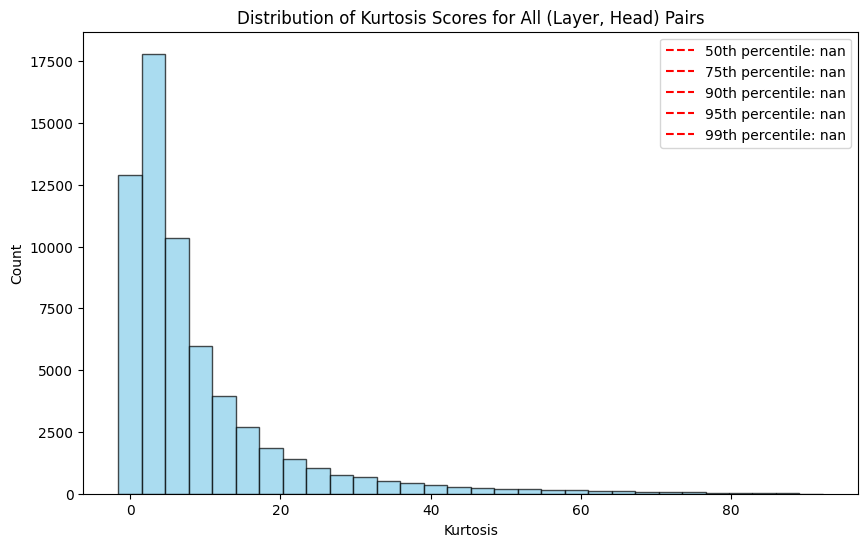

In [24]:


import matplotlib.pyplot as plt
import numpy as np
flat_kurtosis = layer_head_kurtosis.flatten()
plt.figure(figsize=(10,6))
plt.hist(flat_kurtosis, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Kurtosis Scores for All (Layer, Head) Pairs')
plt.xlabel('Kurtosis')
plt.ylabel('Count')
# Plot percentiles
for p in [50, 75, 90, 95, 99]:
    perc = np.percentile(flat_kurtosis, p)
    plt.axvline(perc, color='red', linestyle='--', label=f'{p}th percentile: {perc:.2f}')
plt.legend()
plt.show()

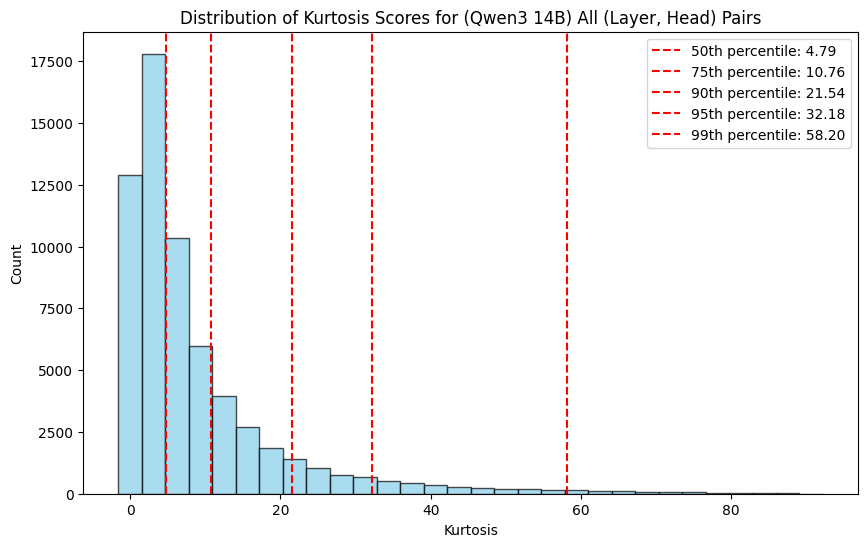

In [31]:
flat_kurtosis = layer_head_kurtosis.flatten()
flat_kurtosis = flat_kurtosis[~np.isnan(flat_kurtosis)]  # Remove NaN values

plt.figure(figsize=(10,6))
plt.hist(flat_kurtosis, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Kurtosis Scores for (Qwen3 14B) All (Layer, Head) Pairs')
plt.xlabel('Kurtosis')
plt.ylabel('Count')
# Plot percentiles
for p in [50, 75, 90, 95, 99]:
    perc = np.percentile(flat_kurtosis, p)
    plt.axvline(perc, color='red', linestyle='--', label=f'{p}th percentile: {perc:.2f}')
plt.legend()
plt.show()

In [26]:
mean_kurtosis = np.nanmean(layer_head_kurtosis, axis=0)  # shape (32, 32)
mean_kurtosis[0, :] = np.nan  # Mask out layer 0

num_top = 38  # Number of heads to select

# Flatten and get indices of top 20 mean kurtosis values (ignoring NaNs)
flat_indices = np.argsort(mean_kurtosis.flatten())[::-1]
flat_indices = flat_indices[~np.isnan(mean_kurtosis.flatten()[flat_indices])][:num_top]
layer_indices, head_indices = np.unravel_index(flat_indices, mean_kurtosis.shape)
top_20_heads = list(zip(layer_indices, head_indices))

print("Top 20 heads by mean kurtosis (layer, head):")
for i, (layer, head) in enumerate(top_20_heads):
    print(f"{i+1:2d}: Layer {layer}, Head {head}, Mean Kurtosis: {mean_kurtosis[layer, head]:.3f}")

Top 20 heads by mean kurtosis (layer, head):
 1: Layer 38, Head 25, Mean Kurtosis: 60.921
 2: Layer 37, Head 30, Mean Kurtosis: 48.164
 3: Layer 36, Head 38, Mean Kurtosis: 48.128
 4: Layer 36, Head 37, Mean Kurtosis: 47.641
 5: Layer 5, Head 17, Mean Kurtosis: 44.574
 6: Layer 38, Head 10, Mean Kurtosis: 43.708
 7: Layer 24, Head 21, Mean Kurtosis: 43.392
 8: Layer 5, Head 16, Mean Kurtosis: 41.851
 9: Layer 5, Head 2, Mean Kurtosis: 41.768
10: Layer 5, Head 0, Mean Kurtosis: 41.575
11: Layer 34, Head 31, Mean Kurtosis: 41.021
12: Layer 31, Head 3, Mean Kurtosis: 39.254
13: Layer 34, Head 34, Mean Kurtosis: 38.802
14: Layer 36, Head 36, Mean Kurtosis: 38.256
15: Layer 38, Head 26, Mean Kurtosis: 37.732
16: Layer 32, Head 2, Mean Kurtosis: 37.727
17: Layer 36, Head 21, Mean Kurtosis: 37.675
18: Layer 23, Head 16, Mean Kurtosis: 37.108
19: Layer 5, Head 3, Mean Kurtosis: 36.874
20: Layer 34, Head 4, Mean Kurtosis: 36.629
21: Layer 34, Head 2, Mean Kurtosis: 34.987
22: Layer 5, Head 7, M

/tmp/ipykernel_473089/2834407406.py:1: RuntimeWarning: Mean of empty slice
  mean_kurtosis = np.nanmean(layer_head_kurtosis, axis=0)  # shape (32, 32)


In [27]:
top_20_heads


[(38, 25),
 (37, 30),
 (36, 38),
 (36, 37),
 (5, 17),
 (38, 10),
 (24, 21),
 (5, 16),
 (5, 2),
 (5, 0),
 (34, 31),
 (31, 3),
 (34, 34),
 (36, 36),
 (38, 26),
 (32, 2),
 (36, 21),
 (23, 16),
 (5, 3),
 (34, 4),
 (34, 2),
 (5, 7),
 (36, 23),
 (32, 3),
 (30, 9),
 (3, 26),
 (4, 27),
 (38, 31),
 (9, 39),
 (5, 23),
 (5, 24),
 (3, 8),
 (6, 30),
 (38, 14),
 (4, 28),
 (34, 3),
 (3, 27),
 (36, 20)]

In [28]:
len(top_20_heads)

38

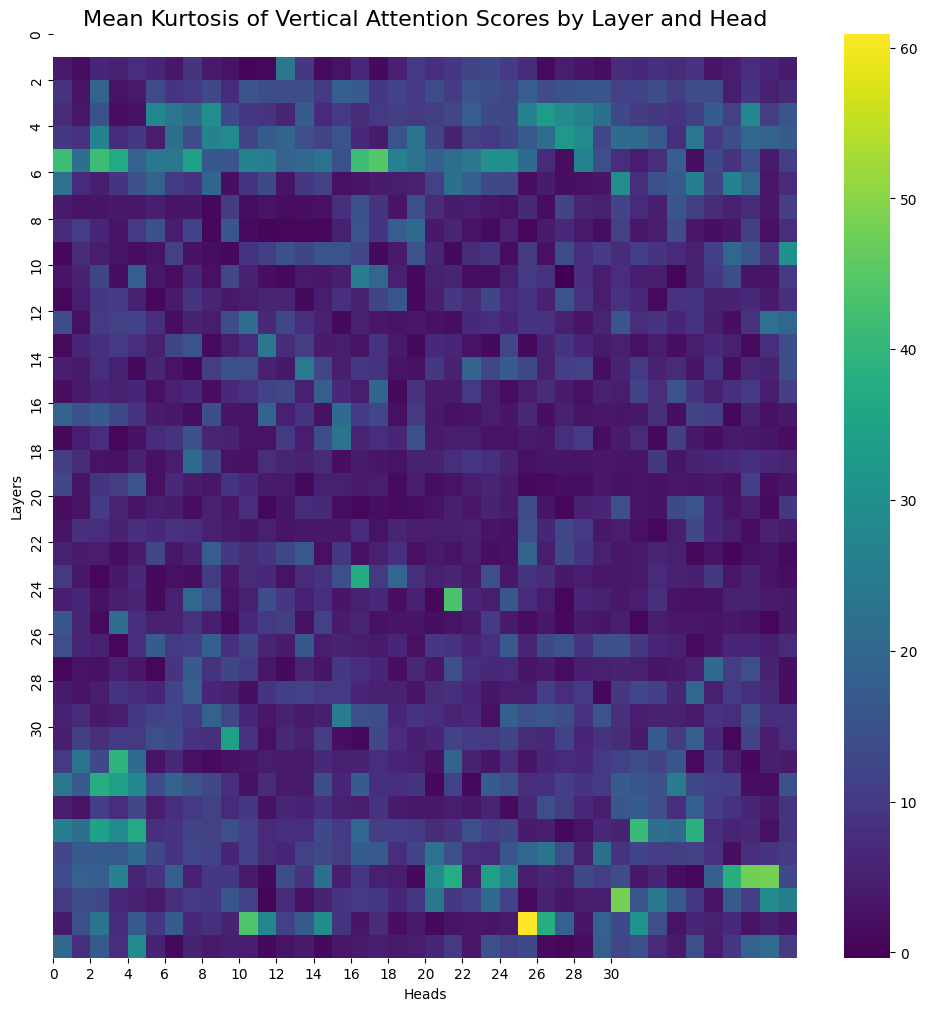

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(mean_kurtosis, cmap='viridis', annot=False, fmt=".2f")
plt.title('Mean Kurtosis of Vertical Attention Scores by Layer and Head', fontsize=16)
plt.xlabel('Heads')
plt.ylabel('Layers')
plt.xticks(np.arange(0, 32, 2), np.arange(0, 32, 2))
plt.yticks(np.arange(0, 32, 2), np.arange(0, 32, 2))
plt.show()